In [13]:
from neo4jrestclient.client import GraphDatabase
from neo4jrestclient import client
import re
import matplotlib.pyplot as plt
import seaborn as sns

from mcl.mcl_clustering import networkx_mcl

import networkx as nx

In [2]:
gdb = GraphDatabase(
    "http://ec2-52-23-203-124.compute-1.amazonaws.com:7474/db/data",
    username="neo4j", password="neo4j2")

In [3]:
def displayGraph(graph, title='', color_values = None):
    pos = nx.spring_layout(graph)
    nx.draw_networkx_edges(graph, pos, arrows=True)
    nx.draw_networkx_nodes(graph, pos, cmap=plt.cm.Blues, node_color = color_values, alpha=0.8)

    nx.draw_networkx_labels(graph,pos)
    plt.title(title)
    plt.show()

In [4]:
zipcode = '06901'

In [10]:
q = 'match (p:Physician)-[r]-() where p.zipCode = "' + zipcode + '" RETURN p,r LIMIT 500'
results = gdb.query(q, returns=(client.Node))
print 'got', len(results), 'results'

done


In [6]:
for r in results:
    #print r[0]
    print r[0].properties
    print r[1]['data']
    print r[1]
    print len(r)
    print '----'

{u'city': u'STAMFORD', u'licenseNumber': u'046965', u'firstName': u'MARC', u'typeCode': u'1', u'middleName': u'ERIC', u'lastName': u'BRODSKY', u'stateName': u'CT', u'zipCode': u'06901', u'licenseState': u'CT', u'taxonomyCode': u'208VP0000X', u'phoneNumber': u'2032764777', u'crediantial': u'MD', u'gender': u'M', u'addressLine1': u'32 STRAWBERRY HILL COURT'}
{u'shared': u'151       ', u'unique': u'11        ', u'same_day': u'0'}
{u'end': u'http://ec2-52-23-203-124.compute-1.amazonaws.com:7474/db/data/node/752404', u'data': {u'shared': u'151       ', u'unique': u'11        ', u'same_day': u'0'}, u'self': u'http://ec2-52-23-203-124.compute-1.amazonaws.com:7474/db/data/relationship/54702775', u'start': u'http://ec2-52-23-203-124.compute-1.amazonaws.com:7474/db/data/node/1670810', u'property': u'http://ec2-52-23-203-124.compute-1.amazonaws.com:7474/db/data/relationship/54702775/properties/{key}', u'type': u'SHARED_PATIENTS', u'properties': u'http://ec2-52-23-203-124.compute-1.amazonaws.com:7

nodes: 138 edges: 125


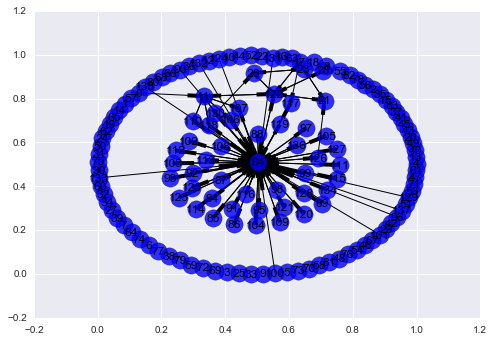

In [17]:
def parse_neo4j_to_nx(results):
    id_pattern = re.compile(r".+/(\d+)$")
    G = nx.DiGraph()
    
    neo4j2node = {}
    
    # first pass add nodes
    num_nodes = 0
    for r in results:
        node_id = id_pattern.search(r[1]['start']).group(1)
        if node_id not in G:
#             print 'adding',node_id
            neo4j2node[node_id] = num_nodes
            G.add_node(node_id, 
#                        neo4j_id=node_id,
                       city=r[0]['city'],
                                firstName=r[0]['firstName'],
                                lastName=r[0]['lastName'],
                                taxonomyCode=r[0]['taxonomyCode'])
            num_nodes += 1

    
    # now add edges
    num_edges = 0
    for r in results:
        node_id = id_pattern.search(r[1]['start']).group(1)
        to_id = id_pattern.search(r[1]['end']).group(1)
        edge_id = id_pattern.search(r[1]['self']).group(1)
        
#         start = neo4j2node[node_id]
#         if to_id in neo4j2node:
#             end = neo4j2node[to_id]
#         print node_id, node_id in G, to_id, to_id in G
#         if (start in G and end in G):
        if (node_id in G and to_ in G):
    #             print 'adding edge',node_id,to_id
                num_edges += 1
                G.add_edge(start, end, edge_id=edge_id)
        
    print 'nodes:', num_nodes, 'edges:', num_edges
    return G
        
graph = parse_neo4j_to_nx(results)
displayGraph(graph)

In [15]:
M, clusters = networkx_mcl(graph, expand_factor=1)
print clusters

{0: [0, 13, 22, 25, 29, 43, 58], 1: [1, 12], 2: [2, 12], 3: [3, 12], 4: [4, 12], 5: [5, 12], 6: [6, 12], 7: [7, 12], 8: [8, 12], 9: [9, 12], 10: [2, 8, 10, 16, 43], 11: [11, 12], 12: [1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29, 30, 32, 33, 34, 36, 37, 38, 39, 40, 42, 43, 44, 47, 48, 49, 50, 56, 57, 58, 60], 13: [0, 12, 13], 14: [12, 14], 15: [12, 15], 16: [10, 16, 23, 24], 17: [12, 17], 18: [12, 18], 19: [12, 19], 20: [12, 20], 21: [12, 21], 22: [0, 12, 22], 23: [16, 23, 43], 24: [16, 24, 43], 25: [0, 12, 25], 26: [12, 26], 27: [12, 27], 28: [12, 28], 29: [0, 12, 29], 30: [12, 30], 31: [12, 31], 32: [12, 32], 33: [12, 33], 34: [12, 24, 34], 35: [12, 35], 36: [12, 36], 37: [12, 37], 38: [12, 38], 39: [12, 39], 40: [12, 40], 41: [12, 41], 42: [12, 42], 43: [0, 10, 12, 23, 24, 43, 59], 44: [12, 44], 45: [12, 45], 46: [12, 46], 47: [12, 47], 48: [12, 48], 49: [12, 49], 50: [12, 50], 51: [12, 51], 52: [12, 52], 53: [12, 53], 54: [0, 54], 55: [12, 55],